finger_data is the file we processed at the Tirgul.

We got the results as events_file_ordered with
the minima's, maxima's and finger number.

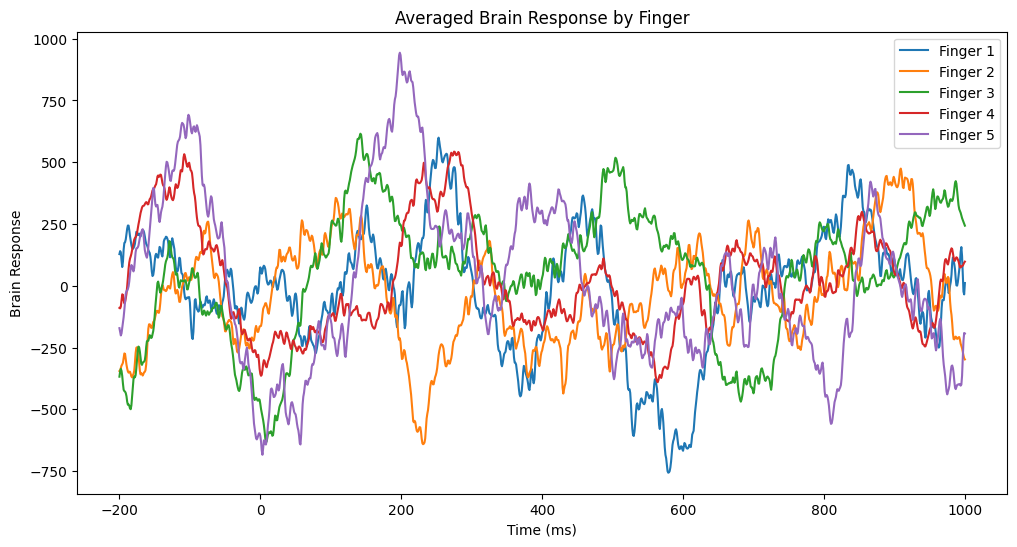

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points, ecog_data):
    # Read CSV files
    trial_df = pd.read_csv(trial_points).astype(int)  # Only this CSV onverted to int, as specified
    ecog_df = pd.read_csv(ecog_data)

    # Initialize output matrix (5 fingers long x 1201ms tall)
    fingers_erp_mean = np.zeros((5, 1201))

    # Process each finger (1-5)
    for finger in range(1, 6):
        # Get minima points (starting points) for current finger
        finger_starts = trial_df[trial_df.iloc[:, 2] == finger].iloc[:, 0]  # minima points

        # Initialize array to store all trials for this finger
        trials_data = []

        # For each starting point (minima), get the window of brain data
        for start in finger_starts:
            # Calculate window indices (200ms before, 1ms at start, 1000ms after)
            window_start = start - 200
            window_end = start + 1001

            # Extract the window of brain data if it's within bounds
            if window_start >= 0 and window_end <= len(ecog_df):
                trial_window = ecog_df.iloc[window_start:window_end].values.flatten()
                if len(trial_window) == 1201:  # Ensure we have the correct window size
                    trials_data.append(trial_window)

        # Convert to numpy array and calculate mean across trials
        trials_array = np.array(trials_data)
        finger_mean = np.mean(trials_array, axis=0)

        # Store in output matrix (finger-1 because array is 0-based)
        fingers_erp_mean[finger-1] = finger_mean

    # Plot averaged brain response for each of the five finger
    plt.figure(figsize=(12, 6))
    time_points = np.arange(-200, 1001)
    for finger in range(5):
        plt.plot(time_points, fingers_erp_mean[finger],
                label=f'Finger {finger+1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Brain Response')
    plt.title('Averaged Brain Response by Finger')
    plt.legend()

    plt.show()

    return fingers_erp_mean

fingers_erp_mean = calc_mean_erp('events_file_ordered.csv', 'brain_data_channel_one.csv')